In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')

In [3]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
data_cleaned = data.drop(columns=['Customer ID', 'City'])

In [5]:
data_cleaned.head()

,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Silver,720.40,13,4.0,True,55,Unsatisfied


In [8]:
label_encoder = LabelEncoder()
data_cleaned['Membership Type'] = label_encoder.fit_transform(data_cleaned['Membership Type'])  # Gold=2, Silver=1, Bronze=0
data_cleaned['Discount Applied'] = label_encoder.fit_transform(data_cleaned['Discount Applied'])  # Yes=1, No=0
data_cleaned['Satisfaction Level'] = label_encoder.fit_transform(data_cleaned['Satisfaction Level'])  # Satisfied=2, Neutral=1, Unsatisfied=0


In [11]:
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

In [12]:
data_cleaned.head()

,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,1,1120.20,14,4.6,1,25,1
1,1,34,2,780.50,11,4.1,0,18,0
2,0,43,0,510.75,9,3.4,1,42,2
3,1,30,1,1480.30,19,4.7,0,12,1
4,1,27,2,720.40,13,4.0,1,55,2


In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [15]:
data_cleaned['Cluster'] = kmeans.labels_

In [16]:
print(data_cleaned)

     Gender  Age  Membership Type  Total Spend  Items Purchased  \
0         0   29                1      1120.20               14   
1         1   34                2       780.50               11   
2         0   43                0       510.75                9   
3         1   30                1      1480.30               19   
4         1   27                2       720.40               13   
..      ...  ...              ...          ...              ...   
345       1   32                2       660.30               10   
346       0   36                0       470.50                8   
347       0   30                1      1190.80               16   
348       1   34                2       780.20               11   
349       0   43                0       515.75               10   

     Average Rating  Discount Applied  Days Since Last Purchase  \
0               4.6                 1                        25   
1               4.1                 0                        

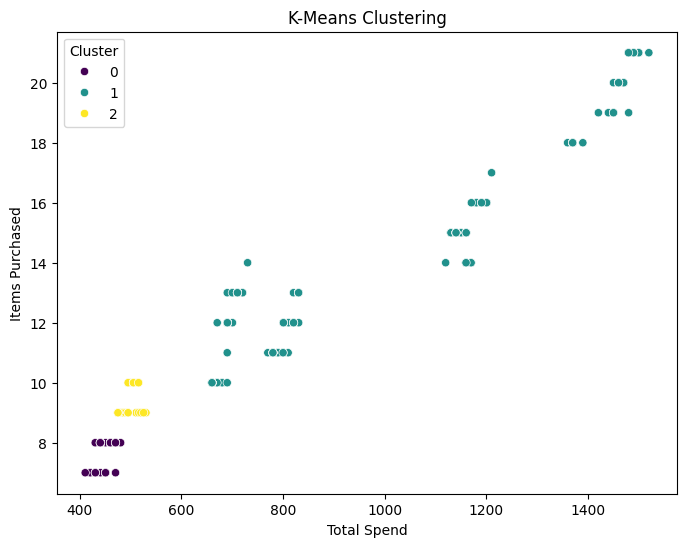

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['Total Spend'], y=data_cleaned['Items Purchased'], hue=data_cleaned['Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

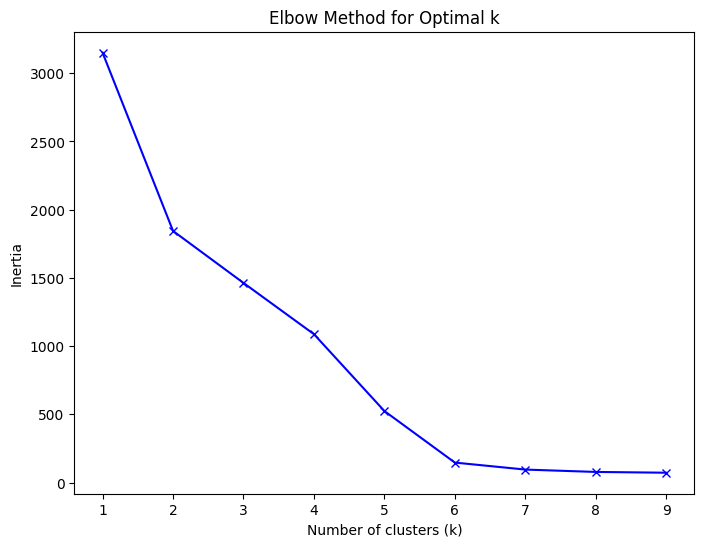

In [18]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()